# Projeto de código "Analise de Dados com Python e Pandas" para o Bootcamp de Dada Engineer da DIO feat. Cognizante

## Etapa 1 = Extração

### Extração e mudança de nome das colunas que seram utilizadas.

In [1]:
# baixando o pacote pandera
!pip install pandera 

     |████████████████████████████████| 166 kB 13.6 MB/s 


In [2]:
# importando as bibliotecas pandas, pandera e matplotlib
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

In [3]:
# fazendo upload do arquivo
df = pd.read_csv('/content/drive/MyDrive/Projeto_codigo_Dio/listings.csv.gz', parse_dates=['host_since','first_review', 'last_review'])

In [4]:
# plotando os dados
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210928134526,2021-09-28,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived in NYC for ...,within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96599,-43.17940,Entire condominium (condo),Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Hangers"", ""Dishes and silverware"", ""Iron"", ""...",$350.00,4,180,4,4,1125,1125,4.0,1125.0,NaN,t,16,46,69,314,2021-09-28,265,12,0,2011-03-30,2021-05-21,4.68,4.78,4.63,4.82,4.9,4.76,4.65,NaN,t,1,1,0,0,2.07
1,24480,https://www.airbnb.com/rooms/24480,20210928134526,2021-09-29,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\nI am a human being fighting f...,within a day,50%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98405,-43.20189,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Clothing storage: wardrobe"", ""Dining table"",...",$297.00,3,90,3,3,90,90,3.0,90.0,NaN,t,0,0,0,30,2021-09-29,85,0,0,2013-08-20,2017-04-22,4.73,4.83,4.78,4.90,4.9,4.97,4.58,NaN,f,1,1,0,0,0.86


In [5]:
# renomeando as colunas
df.rename(columns={'host_id':'anfitriao_id', 'host_name':'anfitriao_nome', 'host_since':'anf_data_cadastro', 'id':'id_anuncio', 'name':'nome_anuncio', 
                  'neighbourhood_cleansed':'bairro', 'property_type':'tipo_propriedade', 'room_type':'tipo_acomodacao', 
                  'accommodates':'numero_hospedes', 'bedrooms':'quartos', 'beds':'camas', 'minimum_nights': 'min_noites', 
                  'maximum_nights':'max_noites', 'has_availability':'disponivel', 'number_of_reviews':'numero_avaliaçoes', 
                  'review_scores_rating':'pontuacao_avaliacoes', 'instant_bookable':'confirmacao_instantanea', 'host_response_time':'anf_tempo_resposta',
                  'review_scores_rating':'pontuacao_avaliacoes', 'instant_bookable':'confirmacao_instantanea', 'host_listings_count':'quant_anuncios', 'host_response_time':'anf_tempo_resposta',
                   'host_response_rate':'anf_taxa_resposta', 'host_acceptance_rate':'anf_taxa_aceitacao', 'host_is_superhost':'super_anfitriao', 'host_neighbourhood':'anf_bairro',
                  'host_total_listings_count':'anf_num_total_anuncios','host_has_profile_pic':'anf_foto_perfil','host_identity_verified':'anf_identidade_verificada'}, inplace=True)

In [6]:
# explorando a base de dados
df.count()

id_anuncio                                      23414
listing_url                                     23414
scrape_id                                       23414
last_scraped                                    23414
nome_anuncio                                    23393
                                                ...  
calculated_host_listings_count                  23414
calculated_host_listings_count_entire_homes     23414
calculated_host_listings_count_private_rooms    23414
calculated_host_listings_count_shared_rooms     23414
reviews_per_month                               15073
Length: 74, dtype: int64

In [7]:
df.dtypes

id_anuncio                                        int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
nome_anuncio                                     object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [8]:
df.shape

(23414, 74)

In [9]:
df.columns

Index(['id_anuncio', 'listing_url', 'scrape_id', 'last_scraped',
       'nome_anuncio', 'description', 'neighborhood_overview', 'picture_url',
       'anfitriao_id', 'host_url', 'anfitriao_nome', 'anf_data_cadastro',
       'host_location', 'host_about', 'anf_tempo_resposta',
       'anf_taxa_resposta', 'anf_taxa_aceitacao', 'super_anfitriao',
       'host_thumbnail_url', 'host_picture_url', 'anf_bairro',
       'quant_anuncios', 'anf_num_total_anuncios', 'host_verifications',
       'anf_foto_perfil', 'anf_identidade_verificada', 'neighbourhood',
       'bairro', 'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'tipo_propriedade', 'tipo_acomodacao', 'numero_hospedes', 'bathrooms',
       'bathrooms_text', 'quartos', 'camas', 'amenities', 'price',
       'min_noites', 'max_noites', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updat

In [10]:
df.describe()

,id_anuncio,scrape_id,anfitriao_id,quant_anuncios,anf_num_total_anuncios,neighbourhood_group_cleansed,latitude,longitude,numero_hospedes,bathrooms,quartos,camas,min_noites,max_noites,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,numero_avaliaçoes,number_of_reviews_ltm,number_of_reviews_l30d,pontuacao_avaliacoes,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.341400e+04,2.341400e+04,2.341400e+04,23396.000000,23396.000000,0.0,23414.000000,23414.000000,23414.000000,0.0,21895.000000,23206.000000,23414.000000,2.341400e+04,23414.000000,23414.000000,2.341400e+04,2.341400e+04,23414.000000,2.341400e+04,0.0,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,15073.000000,14618.000000,14619.000000,14618.000000,14620.000000,14617.000000,14619.000000,0.0,23414.000000,23414.000000,23414.000000,23414.000000,15073.000000
mean,2.641178e+07,2.021093e+13,1.042743e+08,8.844290,8.844290,NaN,-22.965906,-43.248440,4.124840,NaN,1.707422,2.552960,5.286965,9.234445e+04,5.105578,5.873281,9.245231e+04,9.246926e+04,5.284770,9.246479e+04,NaN,19.600752,42.146494,65.361707,229.193004,14.075639,3.211327,0.340822,4.588884,4.790155,4.679409,4.870508,4.850292,4.849142,4.638280,NaN,7.226787,6.344965,0.773981,0.087469,0.649966
std,1.665127e+07,1.921916e+00,1.142081e+08,32.205309,32.205309,NaN,0.035351,0.096823,2.482795,NaN,1.133174,2.288561,20.850200,1.403434e+07,19.243808,20.492825,1.403434e+07,1.403434e+07,19.433421,1.403434e+07,NaN,11.830152,22.532805,32.270046,130.210901,33.261309,7.971381,0.906236,0.942605,0.470820,0.549437,0.397543,0.420981,0.379942,0.508422,NaN,21.690645,21.170269,1.762423,0.613661,0.907623
min,1.787800e+04,2.021093e+13,3.607000e+03,0.000000,0.000000,NaN,-23.072620,-43.698890,0.000000,NaN,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.242405e+07,2.021093e+13,1.427959e+07,1.000000,1.000000,NaN,-22.984650,-43.303010,2.000000,NaN,1.000000,1.000000,1.000000,3.100000e+01,2.000000,2.000000,9.000000e+01,9.000000e+01,2.000000,9.000000e+01,NaN,8.000000,27.000000,48.000000,90.000000,0.000000,0.000000,0.000000,4.650000,4.780000,4.600000,4.900000,4.870000,4.860000,4.500000,NaN,1.000000,1.000000,0.000000,0.000000,0.090000
50%,2.618998e+07,2.021093e+13,6.037972e+07,1.000000,1.000000,NaN,-22.971915,-43.196135,4.000000,NaN,1.000000,2.000000,2.000000,1.124000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.600000,1.125000e+03,NaN,27.000000,56.000000,84.000000,264.000000,2.000000,0.000000,0.000000,4.880000,4.960000,4.870000,5.000000,5.000000,5.000000,4.760000,NaN,1.000000,1.000000,0.000000,0.000000,0.270000
75%,4.193944e+07,2.021093e+13,1.594694e+08,4.000000,4.000000,NaN,-22.950905,-43.186120,5.000000,NaN,2.000000,3.000000,4.000000,1.125000e+03,4.000000,5.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,30.000000,59.000000,89.000000,362.000000,11.000000,2.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,3.000000,2.000000,1.000000,0.000000,0.910000
max,5.249405e+07,2.021093e+13,4.245700e+08,589.000000,589.000000,NaN,-22.749690,-43.104400,16.000000,NaN,47.000000,91.000000,1000.000000,2.147484e+09,730.000000,730.000000,2.147484e+09,2.147484e+09,730.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,486.000000,239.000000,17.000000,5.000000,5.000000,5.000000,5.000000,5.

In [11]:
# a coluna 'price' não pode ser transformada em inteiro pelo formato, então foi aplicado o fatiamento de dados para retirar o simblo '$', em uma coluna que recebeu o nome de 'preco'.
df['preco'] = df['price'].str[1:-3]

In [12]:
# corrigindo a formatação do valor, para mudar o tipo dos dados
def corrigir_preco(preco):
  preco = preco.replace(',','')
  return preco

In [13]:
# aplicando a correção
df['preco'] = df['preco'].apply(corrigir_preco)

In [14]:
# modificando o tipo dos dados
df['anfitriao_id'] = df['anfitriao_id'].astype('object')
df['id_anuncio'] = df['id_anuncio'].astype('object')
df['preco'] = df['preco'].astype('float64')

### Validação dos dados

In [15]:
schema = pa.DataFrameSchema(
    columns = {
        "anfitriao_id":pa.Column(pa.String),
        'anfitriao_nome':pa.Column(pa.String, nullable=True),
        "anf_data_cadastro":pa.Column(pa.DateTime, nullable=True),
        "id_anuncio":pa.Column(pa.String),
        "nome_anuncio":pa.Column(pa.String, nullable=True),
        "bairro":pa.Column(pa.String),
        "tipo_propriedade":pa.Column(pa.String),
        "tipo_acomodacao":pa.Column(pa.String),
        "numero_hospedes":pa.Column(pa.Int),
        "quartos":pa.Column(pa.Float, nullable=True),
        'camas':pa.Column(pa.Float, nullable=True),
        'preco':pa.Column(pa.Float),
        'min_noites':pa.Column(pa.Int),
        'max_noites':pa.Column(pa.Int),
        'disponivel':pa.Column(pa.String),
        'numero_avaliaçoes':pa.Column(pa.Int),
        'pontuacao_avaliacoes':pa.Column(pa.Float, nullable=True),
        'confirmacao_instantanea':pa.Column(pa.String),
        'anf_tempo_resposta':pa.Column(pa.String, nullable=True),
        'anf_taxa_resposta':pa.Column(pa.String, nullable=True),
        'anf_taxa_aceitacao':pa.Column(pa.String, nullable=True),
        'super_anfitriao':pa.Column(pa.String, nullable=True),
        'anf_bairro':pa.Column(pa.String, nullable=True),
        'quant_anuncios':pa.Column(pa.Float, nullable=True),
        'anf_num_total_anuncios':pa.Column(pa.Float, nullable=True),
        'anf_foto_perfil':pa.Column(pa.String, nullable=True),
        'anf_identidade_verificada':pa.Column(pa.String, nullable=True)
    }
)

In [16]:
schema.validate(df)

,id_anuncio,listing_url,scrape_id,last_scraped,nome_anuncio,description,neighborhood_overview,picture_url,anfitriao_id,host_url,anfitriao_nome,anf_data_cadastro,host_location,host_about,anf_tempo_resposta,anf_taxa_resposta,anf_taxa_aceitacao,super_anfitriao,host_thumbnail_url,host_picture_url,anf_bairro,quant_anuncios,anf_num_total_anuncios,host_verifications,anf_foto_perfil,anf_identidade_verificada,neighbourhood,bairro,neighbourhood_group_cleansed,latitude,longitude,tipo_propriedade,tipo_acomodacao,numero_hospedes,bathrooms,bathrooms_text,quartos,camas,amenities,price,min_noites,max_noites,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,disponivel,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,numero_avaliaçoes,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,pontuacao_avaliacoes,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,confirmacao_instantanea,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,preco
0,17878,https://www.airbnb.com/rooms/17878,20210928134526,2021-09-28,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived in NYC for ...,within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.965990,-43.179400,Entire condominium (condo),Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Hangers"", ""Dishes and silverware"", ""Iron"", ""...",$350.00,4,180,4,4,1125,1125,4.0,1125.0,NaN,t,16,46,69,314,2021-09-28,265,12,0,2011-03-30,2021-05-21,4.68,4.78,4.63,4.82,4.90,4.76,4.65,NaN,t,1,1,0,0,2.07,350.0
1,24480,https://www.airbnb.com/rooms/24480,20210928134526,2021-09-29,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\nI am a human being fighting f...,within a day,50%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.984050,-43.201890,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Clothing storage: wardrobe"", ""Dining table"",...",$297.00,3,90,3,3,90,90,3.0,90.0,NaN,t,0,0,0,30,2021-09-29,85,0,0,2013-08-20,2017-04-22,4.73,4.83,4.78,4.90,4.90,4.97,4.58,NaN,f,1,1,0,0,0.86,297.0
2,25026,https://www.airbnb.com/rooms/25026,20210928134526,2021-09-28,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,50%,36%,f,https://a0.muscache.com/im/pictures/user/9e204...,https://a0.muscache.com/im/pictures/user/9e204...,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.977350,-43.191050,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Kitch

## Etapa 2 - Transformação dos Dados

### Limpeza dos Dados

#### DataFrame com informações de anuncios

In [17]:
# criando um dataframe apanas com algumas informaçoes de anuncios
dflistings = df[['anfitriao_id', 'anf_data_cadastro', 'id_anuncio', 'nome_anuncio',
       'bairro', 'tipo_propriedade', 'tipo_acomodacao', 'numero_hospedes',
       'quartos', 'camas', 'preco', 'min_noites', 'max_noites', 'disponivel',
       'numero_avaliaçoes', 'pontuacao_avaliacoes', 'confirmacao_instantanea']]

In [18]:
# plotando o novo dataframe
dflistings.head(2)

,anfitriao_id,anf_data_cadastro,id_anuncio,nome_anuncio,bairro,tipo_propriedade,tipo_acomodacao,numero_hospedes,quartos,camas,preco,min_noites,max_noites,disponivel,numero_avaliaçoes,pontuacao_avaliacoes,confirmacao_instantanea
0,68997,2010-01-08,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Copacabana,Entire condominium (condo),Entire home/apt,5,2.0,2.0,350.0,4,180,t,265,4.68,t
1,99249,2010-03-26,24480,"Nice and cozy near Ipanema Beach, w/ home office",Ipanema,Entire rental unit,Entire home/apt,2,1.0,1.0,297.0,3,90,t,85,4.73,f


In [19]:
# checando os tipos de dados
dflistings.dtypes

anfitriao_id                       object
anf_data_cadastro          datetime64[ns]
id_anuncio                         object
nome_anuncio                       object
bairro                             object
tipo_propriedade                   object
tipo_acomodacao                    object
numero_hospedes                     int64
quartos                           float64
camas                             float64
preco                             float64
min_noites                          int64
max_noites                          int64
disponivel                         object
numero_avaliaçoes                   int64
pontuacao_avaliacoes              float64
confirmacao_instantanea            object
dtype: object

In [20]:
# checando quantas colunas possuem valores nulos
dflistings.isnull().sum()

anfitriao_id                  0
anf_data_cadastro            18
id_anuncio                    0
nome_anuncio                 21
bairro                        0
tipo_propriedade              0
tipo_acomodacao               0
numero_hospedes               0
quartos                    1519
camas                       208
preco                         0
min_noites                    0
max_noites                    0
disponivel                    0
numero_avaliaçoes             0
pontuacao_avaliacoes       8341
confirmacao_instantanea       0
dtype: int64

In [21]:
# checando as colunas
dflistings.columns

Index(['anfitriao_id', 'anf_data_cadastro', 'id_anuncio', 'nome_anuncio',
       'bairro', 'tipo_propriedade', 'tipo_acomodacao', 'numero_hospedes',
       'quartos', 'camas', 'preco', 'min_noites', 'max_noites', 'disponivel',
       'numero_avaliaçoes', 'pontuacao_avaliacoes', 'confirmacao_instantanea'],
      dtype='object')

In [22]:
# checando a quantidade de colunas e linhas
dflistings.shape

(23414, 17)

In [23]:
# removendo valores duplicados
dflistings = dflistings.drop_duplicates()

In [24]:
#checando se haviam valores duplicados para serem removidos
dflistings.shape

(23414, 17)

#### DataFrame com informações de anfitriões

In [25]:
# criando um dataframe apanas com algumas informaçoes de anfitriões
dfhosts = df [['anfitriao_id', 'anfitriao_nome', 'anf_data_cadastro','anf_tempo_resposta',
       'anf_taxa_resposta', 'anf_taxa_aceitacao', 'super_anfitriao', 'anf_bairro',
       'anf_num_total_anuncios', 'anf_foto_perfil', 'anf_identidade_verificada']]

In [26]:
# plotando o novo dataframe
dfhosts.head(2)

,anfitriao_id,anfitriao_nome,anf_data_cadastro,anf_tempo_resposta,anf_taxa_resposta,anf_taxa_aceitacao,super_anfitriao,anf_bairro,anf_num_total_anuncios,anf_foto_perfil,anf_identidade_verificada
0,68997,Matthias,2010-01-08,within an hour,100%,98%,f,Copacabana,2.0,t,t
1,99249,Goya,2010-03-26,within a day,50%,NaN,f,Ipanema,0.0,t,t


In [27]:
# checando os tipos de dados
dfhosts.dtypes

anfitriao_id                         object
anfitriao_nome                       object
anf_data_cadastro            datetime64[ns]
anf_tempo_resposta                   object
anf_taxa_resposta                    object
anf_taxa_aceitacao                   object
super_anfitriao                      object
anf_bairro                           object
anf_num_total_anuncios              float64
anf_foto_perfil                      object
anf_identidade_verificada            object
dtype: object

In [28]:
# checando quantas colunas possuem valores nulos
dfhosts.isnull().sum()

anfitriao_id                     0
anfitriao_nome                  18
anf_data_cadastro               18
anf_tempo_resposta            7593
anf_taxa_resposta             7593
anf_taxa_aceitacao            8754
super_anfitriao                 18
anf_bairro                   10440
anf_num_total_anuncios          18
anf_foto_perfil                 18
anf_identidade_verificada       18
dtype: int64

In [29]:
# checando as colunas
dfhosts.columns

Index(['anfitriao_id', 'anfitriao_nome', 'anf_data_cadastro',
       'anf_tempo_resposta', 'anf_taxa_resposta', 'anf_taxa_aceitacao',
       'super_anfitriao', 'anf_bairro', 'anf_num_total_anuncios',
       'anf_foto_perfil', 'anf_identidade_verificada'],
      dtype='object')

In [30]:
# checando a quantidade de colunas e linhas
dfhosts.shape

(23414, 11)

In [31]:
# removendo valores duplicados
dfhosts = dfhosts.drop_duplicates()

In [32]:
#checando se haviam valores duplicados para serem removidos
dfhosts.shape

(15386, 11)

### Filtros e Groupbys

#### Fazendo alguns filtros para entender os dados de anuncios


In [33]:
dflistings.head(2)

,anfitriao_id,anf_data_cadastro,id_anuncio,nome_anuncio,bairro,tipo_propriedade,tipo_acomodacao,numero_hospedes,quartos,camas,preco,min_noites,max_noites,disponivel,numero_avaliaçoes,pontuacao_avaliacoes,confirmacao_instantanea
0,68997,2010-01-08,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Copacabana,Entire condominium (condo),Entire home/apt,5,2.0,2.0,350.0,4,180,t,265,4.68,t
1,99249,2010-03-26,24480,"Nice and cozy near Ipanema Beach, w/ home office",Ipanema,Entire rental unit,Entire home/apt,2,1.0,1.0,297.0,3,90,t,85,4.73,f


##### Levantamento de anuncios por ano

In [34]:
#df[ocorrencia_dia.dt.year]
dflistings.groupby(dflistings['anf_data_cadastro'].dt.year)['id_anuncio'].count()

anf_data_cadastro
2008.0       1
2009.0      18
2010.0     120
2011.0     829
2012.0    1308
2013.0    2040
2014.0    3653
2015.0    2858
2016.0    5167
2017.0    1811
2018.0    1688
2019.0    1980
2020.0    1347
2021.0     576
Name: id_anuncio, dtype: int64

Text(0.5, 1.0, 'Cadastro de Anfitriões por Ano')

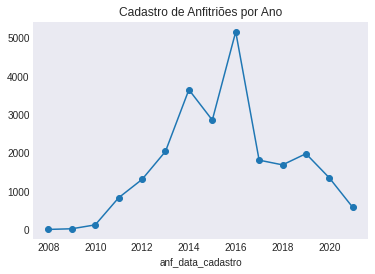

In [35]:
#df[ocorrencia_dia.dt.year]
dflistings.groupby(dflistings['anf_data_cadastro'].dt.year)['id_anuncio'].count().plot.line(marker='o')
plt.title('Cadastro de Anfitriões por Ano')

In [36]:
dflistings.loc[dflistings.anf_data_cadastro.dt.year == 2010]

,anfitriao_id,anf_data_cadastro,id_anuncio,nome_anuncio,bairro,tipo_propriedade,tipo_acomodacao,numero_hospedes,quartos,camas,preco,min_noites,max_noites,disponivel,numero_avaliaçoes,pontuacao_avaliacoes,confirmacao_instantanea
0,68997,2010-01-08,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Copacabana,Entire condominium (condo),Entire home/apt,5,2.0,2.0,350.0,4,180,t,265,4.68,t
1,99249,2010-03-26,24480,"Nice and cozy near Ipanema Beach, w/ home office",Ipanema,Entire rental unit,Entire home/apt,2,1.0,1.0,297.0,3,90,t,85,4.73,f
2,102840,2010-04-03,25026,Beautiful Modern Decorated Studio in Copa,Copacabana,Entire rental unit,Entire home/apt,2,1.0,2.0,160.0,7,60,t,238,4.68,f
3,153232,2010-06-27,35636,Cosy flat close to Ipanema beach,Ipanema,Entire rental unit,Entire home/apt,2,1.0,1.0,271.0,2,89,t,181,4.72,f
4,153691,2010-06-27,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Copacabana,Entire loft,Entire home/apt,2,1.0,1.0,121.0,3,15,t,371,4.90,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22123,224192,2010-09-05,50365821,Djalma Ulrich One Bedroom Near the Beach,Copacabana,Entire rental unit,Entire home/apt,4,1.0,2.0,300.0,3,90,t,0,NaN,t
22277,153721,2010-06-27,50676221,Gem of the Mountain - Spacious & Quiet 1Bed Flat,Flamengo,Entire condominium (condo),Entire home/apt,4,1.0,2.0,156.0,2,1125,t,6,4.33,f
22710,153721,2010-06-27,51557314,Modern Studio with Postcard View in Botafogo B...,Botafogo,Entire rental unit,Entire home/apt,3,1.0,2.0,167.0,2,365,t,3,5.00,f
22754,153721,2010-06-27,51623226,Golden Age One Bedroom Flat in Flamengo near SDU,Flamengo,Entire condominium (condo),Entire home/apt,2,1.0,1.0,220.0,30,1125,t,1,5.00,f


##### Levantamento de anuncios por anfitrião

In [37]:
# Levantamento de anuncios por anfitrião
df.groupby('anfitriao_id')['id_anuncio'].count().sort_values(ascending=False)

anfitriao_id
91654021     187
371026651    134
8975746       85
6000862       74
1500426       60
            ... 
92030829       1
91967394       1
91949736       1
91833486       1
3607           1
Name: id_anuncio, Length: 15386, dtype: int64

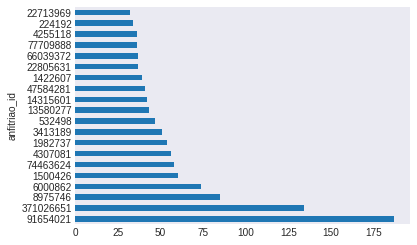

In [38]:
df_host_mais_anuncios = df.groupby('anfitriao_id')['id_anuncio'].count().sort_values(ascending=False)
df_host_mais_anuncios.iloc[:20].plot.barh()

In [39]:
df_anf_est = dflistings.loc[(dflistings.anfitriao_id == 8975746)]

In [40]:
dflistings.loc[dflistings.anfitriao_id == 8975746]

,anfitriao_id,anf_data_cadastro,id_anuncio,nome_anuncio,bairro,tipo_propriedade,tipo_acomodacao,numero_hospedes,quartos,camas,preco,min_noites,max_noites,disponivel,numero_avaliaçoes,pontuacao_avaliacoes,confirmacao_instantanea
2936,8975746,2013-09-21,4124877,Newly Renovated 2 Bedroom in Copacabana # 240,Copacabana,Entire rental unit,Entire home/apt,4,2.0,3.0,460.0,2,90,t,1,0.0,f
3100,8975746,2013-09-21,4665527,apartamento no arpoador ao lado de Ipanema,Copacabana,Entire rental unit,Entire home/apt,11,3.0,6.0,925.0,2,90,t,10,4.1,f
3647,8975746,2013-09-21,6566211,CLASSIC & SPACIOUS OCEAN VIEW 3 BDR,Copacabana,Entire rental unit,Entire home/apt,8,3.0,5.0,885.0,2,90,t,1,0.0,f
3931,8975746,2013-09-21,7952034,Linda Cobertura em Copacabana,Copacabana,Entire rental unit,Entire home/apt,4,2.0,2.0,1097.0,3,1125,t,0,NaN,f
3965,8975746,2013-09-21,8082301,(Brazil) Cobertura praia Copacabana,Copacabana,Entire rental unit,Entire home/apt,6,3.0,3.0,1100.0,3,90,t,0,NaN,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22566,8975746,2013-09-21,51285128,"Flat em Ipanema à 1 quadra da praia, com garag...",Ipanema,Entire rental unit,Entire home/apt,5,2.0,4.0,575.0,1,365,t,0,NaN,f
22573,8975746,2013-09-21,51299347,Cobertura 3 quartos All Suites Ipanema.,Ipanema,Entire rental unit,Entire home/apt,7,3.0,4.0,2070.0,1,365,t,0,NaN,f
22574,8975746,2013-09-21,51299591,Brazil,Copacabana,Room in aparthotel,Entire home/apt,6,3.0,3.0,805.0,1,365,t,0,NaN,f
22575,8975746,2013-09-21,51300940,Mansão no Joá 4 suites,Joá,Entire residential home,Entire home/apt,8,4.0,4.0,9775.0,1,365,t,0,NaN,f


In [41]:
df_anf_est.isnull().sum()

anfitriao_id                0
anf_data_cadastro           0
id_anuncio                  0
nome_anuncio                0
bairro                      0
tipo_propriedade            0
tipo_acomodacao             0
numero_hospedes             0
quartos                     2
camas                       0
preco                       0
min_noites                  0
max_noites                  0
disponivel                  0
numero_avaliaçoes           0
pontuacao_avaliacoes       61
confirmacao_instantanea     0
dtype: int64

Text(0.5, 1.0, 'Variação de Preços por Anuncio com Outliers')

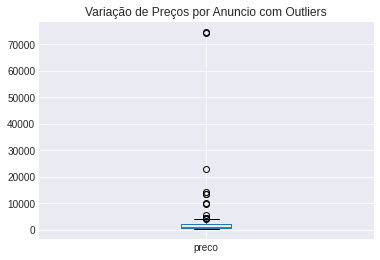

In [42]:
df_anf_est.boxplot(column='preco')
plt.title('Variação de Preços por Anuncio com Outliers')

Text(0.5, 1.0, 'Variação de Preços por Anuncio sem Outliers')

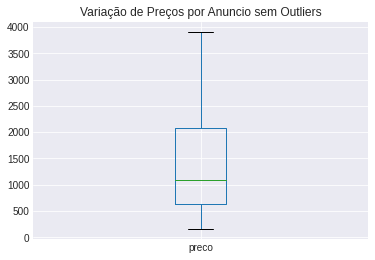

In [43]:
df_anf_est.boxplot(column='preco', showfliers=False)
plt.title('Variação de Preços por Anuncio sem Outliers')

Text(0.5, 1.0, 'Valor das avaliações por quantidade para este Host')

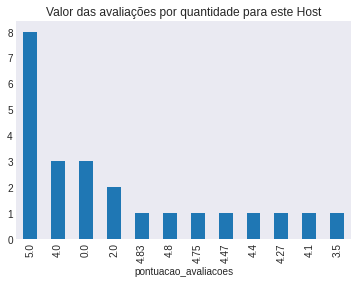

In [44]:
df_anf_est.groupby('pontuacao_avaliacoes')['id_anuncio'].count().sort_values(ascending=False).plot.bar()
plt.title('Valor das avaliações por quantidade para este Host')

numero_avaliaçoes
0     61
1     12
2      4
5      2
15     1
12     1
11     1
10     1
6      1
3      1
Name: id_anuncio, dtype: int64

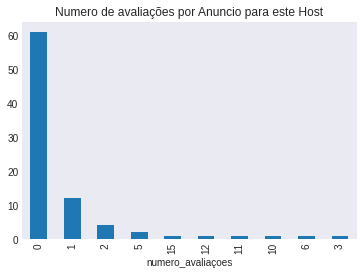

In [45]:
df_anf_est.groupby('numero_avaliaçoes')['id_anuncio'].count().sort_values(ascending=False).plot.bar()
plt.title('Numero de avaliações por Anuncio para este Host')
df_anf_est.groupby('numero_avaliaçoes')['id_anuncio'].count().sort_values(ascending=False)

##### levantamento de anuncios por bairros

In [46]:
# levantamento de anuncios por bairros
df.groupby('bairro')['id_anuncio'].count().sort_values(ascending=False)

bairro
Copacabana                  6708
Barra da Tijuca             2383
Ipanema                     2293
Jacarepaguá                 1121
Recreio dos Bandeirantes    1064
                            ... 
Cavalcanti                     1
Deodoro                        1
Vista Alegre                   1
Acari                          1
Maré                           1
Name: id_anuncio, Length: 153, dtype: int64

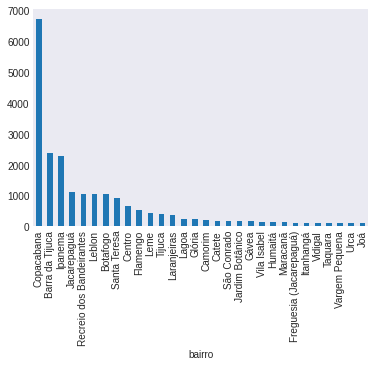

In [47]:
df_bairros = df.groupby('bairro')['id_anuncio'].count().sort_values(ascending=False)
df_bairros.iloc[:30].plot.bar()

##### Levantamento de anuncios por tipo de propriedade

In [48]:
# Levantamento de anuncios por tipo de propriedade
df.groupby('tipo_propriedade')['id_anuncio'].count().sort_values(ascending=False)

tipo_propriedade
Entire rental unit                  13086
Private room in rental unit          3440
Entire condominium (condo)           1412
Private room in residential home     1065
Entire residential home              1028
                                    ...  
Island                                  1
Shared room in cottage                  1
Shared room in castle                   1
Shared room in bungalow                 1
Yurt                                    1
Name: id_anuncio, Length: 86, dtype: int64

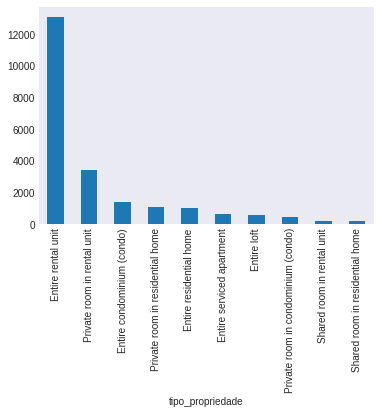

In [49]:
dftipo_propriedade = df.groupby('tipo_propriedade')['id_anuncio'].count().sort_values(ascending=False)
dftipo_propriedade[:10].plot.bar()

In [50]:
dflistings.loc[(dflistings.tipo_propriedade == 'Island') | (dflistings.tipo_propriedade == 'Yurt') | (dflistings.tipo_propriedade == 'Shared room in castle') | (dflistings.tipo_propriedade == 'Shared room in cottage') | (dflistings.tipo_propriedade == 'Shared room in bungalow')]

,anfitriao_id,anf_data_cadastro,id_anuncio,nome_anuncio,bairro,tipo_propriedade,tipo_acomodacao,numero_hospedes,quartos,camas,preco,min_noites,max_noites,disponivel,numero_avaliaçoes,pontuacao_avaliacoes,confirmacao_instantanea
9535,61456478,2016-03-03,17430810,Paradise Island in Barra next to Subway Station,Barra da Tijuca,Island,Entire home/apt,5,1.0,3.0,141.0,3,1125,t,35,4.91,f
10123,52812778,2015-12-30,20480385,Recanto da Vovó Tanta,Guaratiba,Yurt,Entire home/apt,5,2.0,2.0,300.0,1,7,t,0,NaN,t
13694,238713778,2019-01-24,32575245,Santa Carioca,Santa Teresa,Shared room in cottage,Shared room,3,1.0,3.0,150.0,3,1125,t,3,4.33,f
13705,244151757,2019-02-19,32589993,CARNAVAL EM SANTA TERESA,Santa Teresa,Shared room in bungalow,Shared room,4,1.0,3.0,1000.0,3,15,t,0,NaN,t
19823,85745184,2016-07-24,46512209,QUARTO TIJUCA PRÓXIMO AO METRO E TODO RIO.,Tijuca,Shared room in castle,Shared room,2,1.0,1.0,114.0,2,7,t,0,NaN,f


##### Levantamento de anuncios por tipo de acomodação

In [51]:
# Levantamento de anuncios por tipo de acomodação
dflistings['tipo_acomodacao'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [52]:
df.groupby('tipo_acomodacao')['id_anuncio'].count().sort_values(ascending=False)

tipo_acomodacao
Entire home/apt    17118
Private room        5673
Shared room          540
Hotel room            83
Name: id_anuncio, dtype: int64

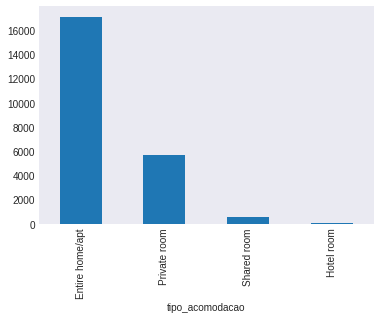

In [53]:
df.groupby('tipo_acomodacao')['id_anuncio'].count().sort_values(ascending=False).plot.bar()

##### Levantamento de numero de hospedes por anuncio

In [54]:
# Levantamento de numero de hospedes por anuncio
df.groupby('numero_hospedes')['id_anuncio'].count().sort_values(ascending=False)

numero_hospedes
4     6277
2     6083
6     2847
3     2523
5     1852
1     1270
8      911
7      515
10     446
12     179
16     177
9      137
14      62
15      54
11      41
13      33
0        7
Name: id_anuncio, dtype: int64

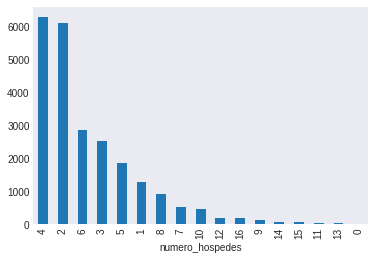

In [55]:
df.groupby('numero_hospedes')['id_anuncio'].count().sort_values(ascending=False).plot.bar()

##### Levantamento de numero de quartos por anuncio

In [56]:
# Levantamento de numero de quartos por anuncio
df.groupby('quartos')['id_anuncio'].count().sort_values(ascending=False)

quartos
1.0     12295
2.0      5767
3.0      2740
4.0       676
5.0       221
6.0       107
7.0        35
8.0        14
9.0        11
10.0       10
11.0        6
12.0        3
30.0        2
15.0        2
20.0        2
14.0        1
17.0        1
18.0        1
47.0        1
Name: id_anuncio, dtype: int64

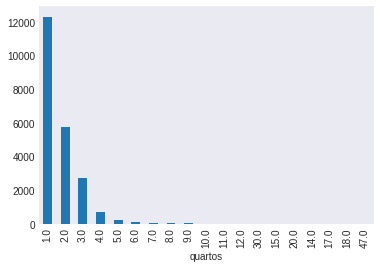

In [57]:
# Levantamento de numero de quartos por anuncio
df.groupby('quartos')['id_anuncio'].count().sort_values(ascending=False).plot.bar()

In [58]:
dflistings.loc[(dflistings.quartos == 17)]

,anfitriao_id,anf_data_cadastro,id_anuncio,nome_anuncio,bairro,tipo_propriedade,tipo_acomodacao,numero_hospedes,quartos,camas,preco,min_noites,max_noites,disponivel,numero_avaliaçoes,pontuacao_avaliacoes,confirmacao_instantanea
8431,56259668,2016-01-26,14652423,casa de hospedes para grupos de 6 pessoas recreio,Vargem Grande,Entire guesthouse,Entire home/apt,6,17.0,38.0,53.0,1,90,t,1,4.0,f


##### Levantamento de quantidade de camas por anuncio

In [59]:
# Levantamento de quantidade de camas por anuncio
df.groupby('camas')['id_anuncio'].count().sort_values(ascending=False)

camas
1.0     7308
2.0     6442
3.0     3961
4.0     2237
5.0     1153
6.0      713
0.0      580
7.0      243
8.0      229
9.0       85
10.0      76
11.0      32
12.0      29
16.0      29
13.0      18
15.0      17
14.0      11
30.0       5
50.0       4
20.0       4
17.0       4
23.0       3
18.0       2
22.0       2
24.0       2
26.0       2
27.0       2
35.0       2
38.0       2
52.0       1
21.0       1
25.0       1
29.0       1
31.0       1
33.0       1
41.0       1
43.0       1
91.0       1
Name: id_anuncio, dtype: int64

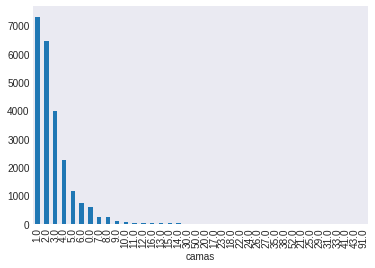

In [60]:
df_camas = df.groupby('camas')['id_anuncio'].count().sort_values(ascending=False)
df_camas.iloc[:].plot.bar()

In [61]:
dflistings.loc[(dflistings.camas == 91)]

,anfitriao_id,anf_data_cadastro,id_anuncio,nome_anuncio,bairro,tipo_propriedade,tipo_acomodacao,numero_hospedes,quartos,camas,preco,min_noites,max_noites,disponivel,numero_avaliaçoes,pontuacao_avaliacoes,confirmacao_instantanea
4755,13384955,2014-03-21,10283474,House near best beaches in Rio,Guaratiba,Earth house,Entire home/apt,16,5.0,91.0,3953.0,2,30,t,0,NaN,f


##### Levantamento de preços

In [62]:
# Levantamento de preços
dflistings['preco'].sort_values(ascending=False)

7172     621850.0
15659    133820.0
7189     129080.0
3718     129080.0
3701     129080.0
           ...   
18368         0.0
18410         0.0
18432         0.0
18451         0.0
18409         0.0
Name: preco, Length: 23414, dtype: float64

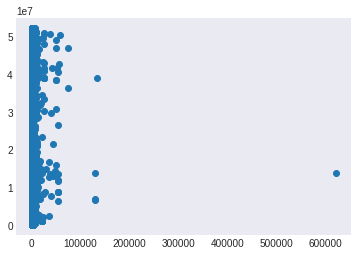

In [63]:
plt.scatter(dflistings.preco, dflistings.id_anuncio)

Text(0, 0.5, 'Valor por Diaria')

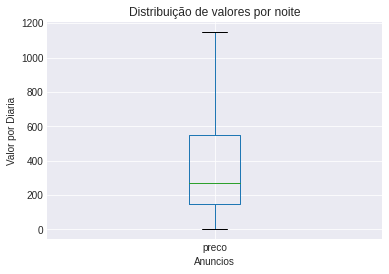

In [64]:
dflistings.boxplot(column='preco', showfliers=False)
plt.title('Distribuição de valores por noite')
plt.xlabel('Anuncios')
plt.ylabel('Valor por Diaria')

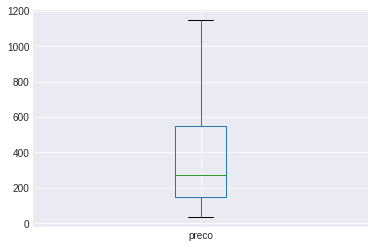

In [65]:
filtro1 = dflistings.preco != 0
#filtro2 = dflistings.preco <= 100000
df_preco = dflistings.loc[filtro1]
#df_preco.head(2)
df_preco.boxplot(column='preco', showfliers=False, )

In [66]:
df_preco.describe()

,numero_hospedes,quartos,camas,preco,min_noites,max_noites,numero_avaliaçoes,pontuacao_avaliacoes
count,23407.000000,21895.000000,23206.000000,23407.000000,23407.000000,2.340700e+04,23407.000000,15072.000000
mean,4.126073,1.707422,2.552960,715.265006,5.288204,9.237197e+04,14.074251,4.588889
std,2.482141,1.133174,2.288561,4949.083983,20.853193,1.403644e+07,33.256738,0.942637
min,1.000000,1.000000,0.000000,33.000000,1.000000,1.000000e+00,0.000000,0.000000
25%,2.000000,1.000000,1.000000,150.000000,1.000000,3.100000e+01,0.000000,4.650000
50%,4.000000,1.000000,2.000000,270.000000,2.000000,1.124000e+03,2.000000,4.880000
75%,5.000000,2.000000,3.000000,550.000000,4.000000,1.125000e+03,11.000000,5.000000
max,16.000000,47.000000,91.000000,621850.000000,1000.000000,2.147484e+09,486.000000,5.000000


In [67]:
dflistings.loc[dflistings.preco == 621850.0 ]

,anfitriao_id,anf_data_cadastro,id_anuncio,nome_anuncio,bairro,tipo_propriedade,tipo_acomodacao,numero_hospedes,quartos,camas,preco,min_noites,max_noites,disponivel,numero_avaliaçoes,pontuacao_avaliacoes,confirmacao_instantanea
7172,82046629,2016-07-06,13879989,Temporary rentals for Brazilian Cup.,São Cristóvão,Shared room in residential home,Shared room,5,1.0,4.0,621850.0,6,8,t,0,NaN,t


##### Levantamento de quantidade minima de noites por anuncio

In [68]:
# Levantamento de quantidade minima de noites por anuncio
dflistings.groupby('min_noites')['id_anuncio'].count().sort_values(ascending=False)

min_noites
1       6025
2       5804
3       4832
5       1786
4       1746
        ... 
78         1
52         1
50         1
730        1
1000       1
Name: id_anuncio, Length: 67, dtype: int64

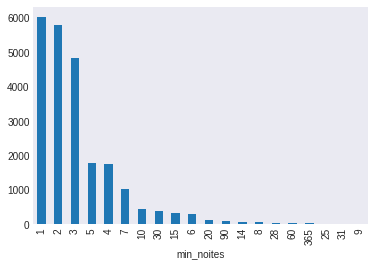

In [69]:
df_min_noites = dflistings.groupby('min_noites')['id_anuncio'].count().sort_values(ascending=False)
df_min_noites[:20].plot.bar()

In [70]:
dflistings.loc[dflistings.min_noites == 1000 ]

,anfitriao_id,anf_data_cadastro,id_anuncio,nome_anuncio,bairro,tipo_propriedade,tipo_acomodacao,numero_hospedes,quartos,camas,preco,min_noites,max_noites,disponivel,numero_avaliaçoes,pontuacao_avaliacoes,confirmacao_instantanea
18480,289700318,2019-08-27,43424121,"Linda , cobertura no Méier",Cachambi,Private room in rental unit,Private room,6,3.0,6.0,24415.0,1000,1125,t,0,NaN,f


##### Levantamento de quantidade maxima de noites por anuncio

In [71]:
# Levantamento de quantidade maxima de noites por anuncio
dflistings.groupby('max_noites')['id_anuncio'].count().sort_values(ascending=False)

max_noites
1125    11687
30       2421
365      1646
90       1464
15        700
        ...  
355         1
358         1
364         1
368         1
195         1
Name: id_anuncio, Length: 201, dtype: int64

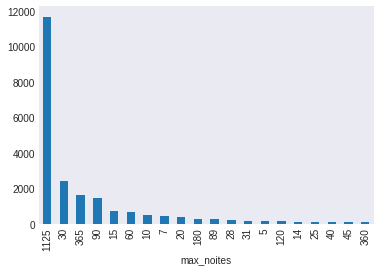

In [72]:
df_max_noites = dflistings.groupby('max_noites')['id_anuncio'].count().sort_values(ascending=False)
df_max_noites[:20].plot.bar()

##### Levantamento de disponibilidade por anuncio

In [73]:
# Levantamento de disponibilidade por anuncio
dflistings.groupby('disponivel')['id_anuncio'].count().sort_values(ascending=False)

disponivel
t    23378
f       36
Name: id_anuncio, dtype: int64

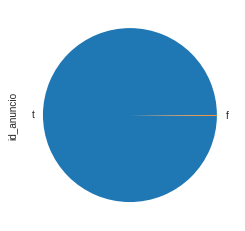

In [74]:
dflistings.groupby('disponivel')['id_anuncio'].count().sort_values(ascending=False).plot.pie()

##### Levantamento de numero_avaliaçoes por anuncio

In [75]:
# Levantamento de numero_avaliaçoes por anuncio
dflistings.groupby('numero_avaliaçoes')['id_anuncio'].count().sort_values(ascending=False)	

numero_avaliaçoes
0      8341
1      2783
2      1611
3      1093
4       880
       ... 
266       1
268       1
270       1
271       1
486       1
Name: id_anuncio, Length: 286, dtype: int64

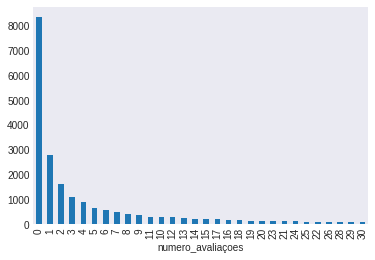

In [76]:
df_min_noites = dflistings.groupby('numero_avaliaçoes')['id_anuncio'].count().sort_values(ascending=False)
df_min_noites[:30].plot.bar()

In [77]:
dflistings.loc[dflistings.numero_avaliaçoes == 486 ]

,anfitriao_id,anf_data_cadastro,id_anuncio,nome_anuncio,bairro,tipo_propriedade,tipo_acomodacao,numero_hospedes,quartos,camas,preco,min_noites,max_noites,disponivel,numero_avaliaçoes,pontuacao_avaliacoes,confirmacao_instantanea
290,2444956,2012-05-23,494903,CASABLANCA 1 STUNNING BEACHFRONT,Vidigal,Tiny house,Entire home/apt,2,1.0,2.0,240.0,2,180,t,486,4.87,t


##### Levantamento de pontuação das avaliaçoes por anuncio

In [78]:
# Levantamento de pontuação das avaliaçoes por anuncio
dflistings.groupby('pontuacao_avaliacoes')['id_anuncio'].count().sort_values(ascending=False)	

pontuacao_avaliacoes
5.00    5722
4.00     564
4.50     551
4.67     455
0.00     453
        ... 
3.43       1
3.17       1
3.78       1
4.16       1
3.91       1
Name: id_anuncio, Length: 132, dtype: int64

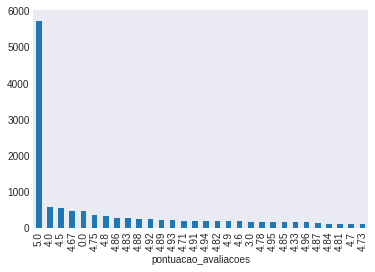

In [79]:
df_pont_ava = dflistings.groupby('pontuacao_avaliacoes')['id_anuncio'].count().sort_values(ascending=False)
df_pont_ava.iloc[:30].plot.bar()

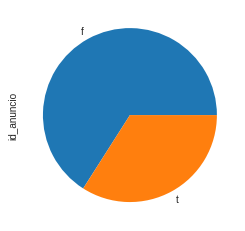

In [80]:
# Levantamento de confirmacao_instantanea por anuncio
df.groupby('confirmacao_instantanea')['id_anuncio'].count().plot.pie()	

#### Fazendo alguns filtros para entender os dados de anfitriões

In [81]:
dfhosts.head(2)

,anfitriao_id,anfitriao_nome,anf_data_cadastro,anf_tempo_resposta,anf_taxa_resposta,anf_taxa_aceitacao,super_anfitriao,anf_bairro,anf_num_total_anuncios,anf_foto_perfil,anf_identidade_verificada
0,68997,Matthias,2010-01-08,within an hour,100%,98%,f,Copacabana,2.0,t,t
1,99249,Goya,2010-03-26,within a day,50%,NaN,f,Ipanema,0.0,t,t


##### Levantamento de Cadastro de Anfitriao por Ano

In [82]:
#df[ocorrencia_dia.dt.year]
dfhosts.groupby(dfhosts['anf_data_cadastro'].dt.year)['anfitriao_id'].count()

anf_data_cadastro
2008.0       1
2009.0       6
2010.0      43
2011.0     347
2012.0     605
2013.0    1110
2014.0    2395
2015.0    1932
2016.0    3793
2017.0    1263
2018.0    1191
2019.0    1407
2020.0     848
2021.0     431
Name: anfitriao_id, dtype: int64

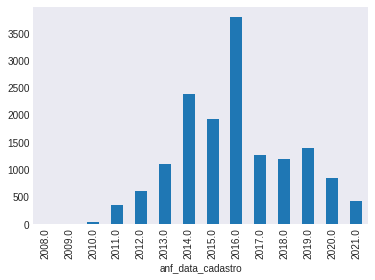

In [83]:
#df[ocorrencia_dia.dt.year]
dfhosts.groupby(dfhosts['anf_data_cadastro'].dt.year)['anfitriao_id'].count().plot.bar()

##### Levantamento de anuncios por anfitrião

In [84]:
# Levantamento de anuncios por anfitrião
filtro = dfhosts.anf_num_total_anuncios >= 100
dfhosts.loc[filtro]

,anfitriao_id,anfitriao_nome,anf_data_cadastro,anf_tempo_resposta,anf_taxa_resposta,anf_taxa_aceitacao,super_anfitriao,anf_bairro,anf_num_total_anuncios,anf_foto_perfil,anf_identidade_verificada
151,1381764,Cavi Rio - Fabio,2011-11-07,within an hour,100%,99%,f,Copacabana,100.0,t,t
2936,8975746,Maria Ivani,2013-09-21,within a day,77%,49%,f,Copacabana,106.0,t,t
3150,22805631,Latin Exclusive,2014-10-21,within an hour,97%,50%,t,Ipanema,222.0,t,t
8554,66039372,Vitor & Carlos,2016-04-06,NaN,NaN,NaN,f,Ipanema,108.0,t,t
8732,91654021,Daniel,2016-08-24,within a few hours,97%,58%,t,Ipanema,256.0,t,t
10482,31898183,"Loic, Estelle & Co",2015-04-25,within an hour,100%,80%,f,Copacabana,350.0,t,t
18151,266952283,"Loic, Estelle & Co",2019-06-07,within an hour,100%,70%,f,NaN,192.0,t,t
18910,135845476,Casa Do Mar,2017-06-19,within a day,76%,0%,f,NaN,148.0,t,t
20415,23987702,CarpediemHomes,2014-11-20,within an hour,99%,98%,f,NaN,241.0,t,t
21072,31968314,Housi,2015-04-26,within an hour,91%,91%,f,Vila Olímpia,589.0,t,t


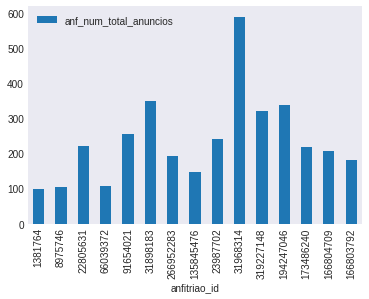

In [85]:
filtro = dfhosts.anf_num_total_anuncios >= 100
dfhosts.loc[filtro].plot.bar(x='anfitriao_id', y='anf_num_total_anuncios')

In [86]:
dfhosts.loc[dfhosts.anfitriao_id == 31968314 ]

,anfitriao_id,anfitriao_nome,anf_data_cadastro,anf_tempo_resposta,anf_taxa_resposta,anf_taxa_aceitacao,super_anfitriao,anf_bairro,anf_num_total_anuncios,anf_foto_perfil,anf_identidade_verificada
21072,31968314,Housi,2015-04-26,within an hour,91%,91%,f,Vila Olímpia,589.0,t,t


##### Levantamento de tempo de resposta por anfitrião

In [87]:
# Levantamento de tempo de resposta por anfitrião
df.groupby('anf_tempo_resposta')['anfitriao_id'].count().sort_values(ascending=False)

anf_tempo_resposta
within an hour        6346
within a few hours    3709
within a day          2960
a few days or more    2806
Name: anfitriao_id, dtype: int64

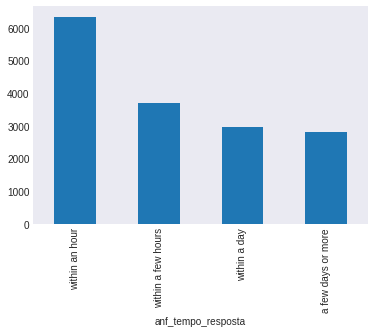

In [88]:
df.groupby('anf_tempo_resposta')['anfitriao_id'].count().sort_values(ascending=False).plot.bar()

##### Levantamento de taxa de resposta por anfitrião

In [89]:
dfhosts.groupby('anf_taxa_resposta')['anfitriao_id'].count().sort_values(ascending=False)

anf_taxa_resposta
100%    5102
0%      1419
50%      333
90%      322
80%      186
        ... 
36%        1
66%        1
12%        1
31%        1
49%        1
Name: anfitriao_id, Length: 92, dtype: int64

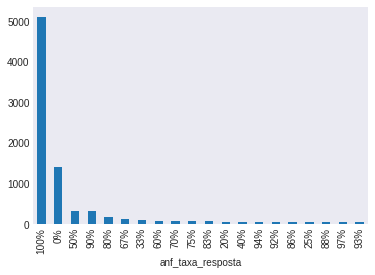

In [90]:
df_taxa_resp = dfhosts.groupby('anf_taxa_resposta')['anfitriao_id'].count().sort_values(ascending=False)
df_taxa_resp[:20].plot.bar()

##### Levantamento de taxa de aceitação por anfitrião

In [91]:
dfhosts.groupby('anf_taxa_aceitacao')['anfitriao_id'].count().sort_values(ascending=False)

anf_taxa_aceitacao
100%    3322
0%      1208
50%      365
67%      235
75%      155
        ... 
6%         2
4%         2
51%        1
5%         1
3%         1
Name: anfitriao_id, Length: 98, dtype: int64

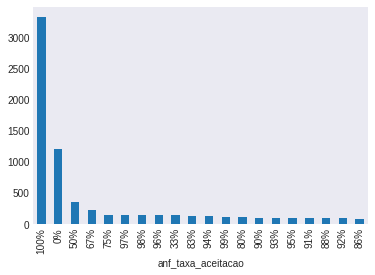

In [92]:
df_taxa_resp = dfhosts.groupby('anf_taxa_aceitacao')['anfitriao_id'].count().sort_values(ascending=False)
df_taxa_resp[:20].plot.bar()

In [93]:
dfhosts.anf_taxa_aceitacao.isnull().sum()

7019

##### Levantamento de Super Anfitrião

In [94]:
dfhosts.groupby('super_anfitriao')['anfitriao_id'].count().sort_values(ascending=False)

super_anfitriao
f    13041
t     2331
Name: anfitriao_id, dtype: int64

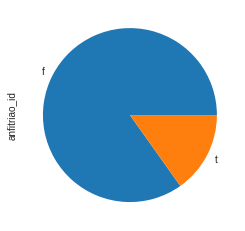

In [95]:
dfhosts.groupby('super_anfitriao')['anfitriao_id'].count().sort_values(ascending=False).plot.pie()

##### Lavantamento de Bairro do Anfitrião

In [96]:
dfhosts.groupby('anf_bairro')['anfitriao_id'].count().sort_values(ascending=False)

anf_bairro
Copacabana           2171
Barra da Tijuca       773
Ipanema               650
Botafogo              379
Leblon                341
                     ... 
Nazaré                  1
North Miami Beach       1
North Shore             1
Olaria                  1
Le Marais               1
Name: anfitriao_id, Length: 148, dtype: int64

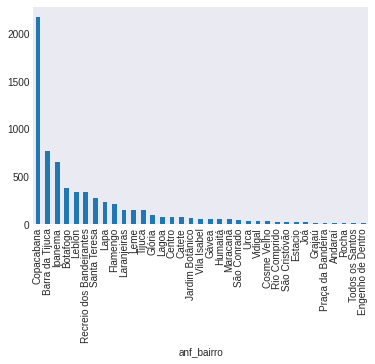

In [97]:
df_bairro_anf = dfhosts.groupby('anf_bairro')['anfitriao_id'].count().sort_values(ascending=False)
df_bairro_anf[:35].plot.bar()

In [98]:
dfhosts.anf_bairro.isnull().sum()

8316

##### Lavantamento de Anfitrioes com foto de Perfil

In [99]:
dfhosts.groupby('anf_foto_perfil')['anfitriao_id'].count().sort_values(ascending=False)

anf_foto_perfil
t    15267
f      105
Name: anfitriao_id, dtype: int64

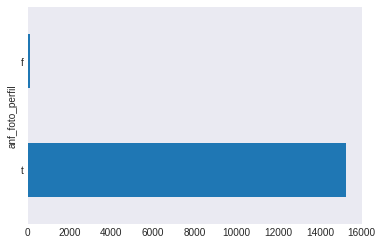

In [100]:
dfhosts.groupby('anf_foto_perfil')['anfitriao_id'].count().sort_values(ascending=False).plot.barh()

In [101]:
filtro = dfhosts.anf_foto_perfil == 'f'
df_foto_f = dfhosts[filtro]

In [102]:
filtro = dfhosts.anf_foto_perfil == 't'
df_foto_t = dfhosts[filtro]

In [103]:
df_foto_f

,anfitriao_id,anfitriao_nome,anf_data_cadastro,anf_tempo_resposta,anf_taxa_resposta,anf_taxa_aceitacao,super_anfitriao,anf_bairro,anf_num_total_anuncios,anf_foto_perfil,anf_identidade_verificada
10,393296342,Alex,2021-03-19,NaN,NaN,NaN,f,NaN,2.0,f,f
3829,20134185,Sabrina,2014-08-17,a few days or more,0%,NaN,f,NaN,1.0,f,f
4526,50620948,Rafael,2015-12-06,NaN,NaN,NaN,f,NaN,1.0,f,f
5156,56967708,Charles,2016-02-01,NaN,NaN,NaN,f,Copacabana,1.0,f,f
5690,64822833,Amanda,2016-03-28,NaN,NaN,NaN,f,NaN,1.0,f,f
...,...,...,...,...,...,...,...,...,...,...,...
23098,422136195,Gustavo,2021-09-08,within a day,50%,100%,f,NaN,1.0,f,t
23122,422336093,Kátia,2021-09-09,a few days or more,22%,100%,f,NaN,0.0,f,f
23203,423013364,Rosânge,2021-09-14,within a few hours,100%,100%,f,NaN,1.0,f,t
23225,423191310,Carlos George,2021-09-15,NaN,NaN,NaN,f,NaN,0.0,f,t


In [104]:
df_foto_f.groupby('super_anfitriao')['anfitriao_id'].count().sort_values(ascending=False)

super_anfitriao
f    105
Name: anfitriao_id, dtype: int64

In [105]:
df_foto_t.groupby('super_anfitriao')['anfitriao_id'].count().sort_values(ascending=False)

super_anfitriao
f    12936
t     2331
Name: anfitriao_id, dtype: int64

##### Levantamento de Anfitriões com Identidade Verificada

In [106]:
dfhosts.groupby('anf_identidade_verificada')['anfitriao_id'].count()

anf_identidade_verificada
f    6293
t    9079
Name: anfitriao_id, dtype: int64

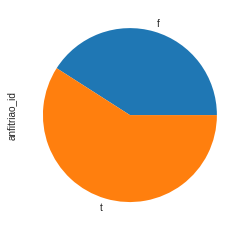

In [107]:
dfhosts.groupby('anf_identidade_verificada')['anfitriao_id'].count().plot.pie()

### Montando alguns DataFrames com Filtos Especificos

##### DataFrame com informaçoes dos 5 bairros com mais anuncios

In [108]:
filtro1 = dflistings.bairro.isin(['Copacabana','Barra da Tijuca','Ipanema','Jacarepaguá','Recreio dos Bandeirantes'])
df_5bairros = dflistings.loc[filtro1]

In [109]:
df_5bairros.count()

anfitriao_id               13569
anf_data_cadastro          13561
id_anuncio                 13569
nome_anuncio               13564
bairro                     13569
tipo_propriedade           13569
tipo_acomodacao            13569
numero_hospedes            13569
quartos                    12668
camas                      13480
preco                      13569
min_noites                 13569
max_noites                 13569
disponivel                 13569
numero_avaliaçoes          13569
pontuacao_avaliacoes        9132
confirmacao_instantanea    13569
dtype: int64

In [110]:
df_5bairros.groupby(['bairro']).size()

bairro
Barra da Tijuca             2383
Copacabana                  6708
Ipanema                     2293
Jacarepaguá                 1121
Recreio dos Bandeirantes    1064
dtype: int64

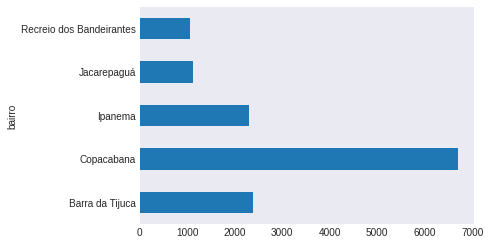

In [111]:
df_5bairros.groupby(['bairro']).size().plot.barh()

In [112]:
df_5bairros.groupby(['bairro']).mean()

,numero_hospedes,quartos,camas,preco,min_noites,max_noites,numero_avaliaçoes,pontuacao_avaliacoes
bairro,,,,,,,,
Barra da Tijuca,4.500210,1.897603,2.727618,929.673521,5.563575,667.535460,11.565674,4.596299
Copacabana,4.223912,1.606401,2.536267,603.129696,5.192606,613.689326,19.507156,4.586232
Ipanema,4.172263,1.808676,2.543145,700.007414,5.196686,937186.265155,22.506760,4.644411
Jacarepaguá,3.988403,1.776557,2.549865,672.054416,5.326494,603.060660,6.595004,4.488905
Recreio dos Bandeirantes,4.847744,2.025267,3.023652,984.614662,4.322368,582.346805,7.721805,4.542741


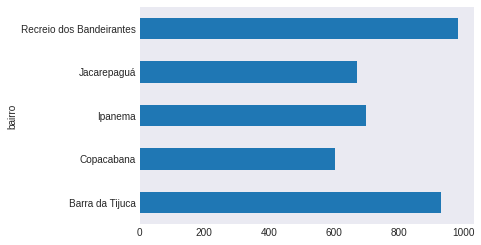

In [113]:
df_5bairros.groupby(['bairro']).preco.mean().plot.barh()
#plt.savefig('preço por bairro.png')

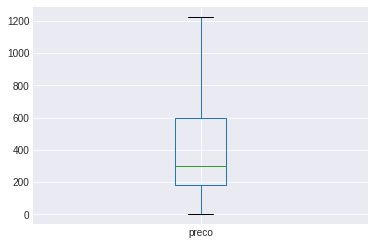

In [114]:
df_5bairros.boxplot(column='preco', showfliers=False)

In [115]:
df_5bairros.groupby([df_5bairros.anf_data_cadastro.dt.year]).size()

anf_data_cadastro
2009.0      12
2010.0      84
2011.0     514
2012.0     768
2013.0    1234
2014.0    1976
2015.0    1737
2016.0    2977
2017.0    1066
2018.0     889
2019.0    1159
2020.0     841
2021.0     304
dtype: int64

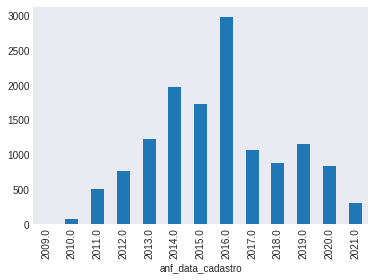

In [116]:
df_5bairros.groupby([df_5bairros.anf_data_cadastro.dt.year]).size().plot.bar()

##### DataFrame com informaçoes dos 5 bairros com mais anuncios no ano de 2016

In [117]:
##### DataFrame com informaçoes dos 5 bairros com mais anuncios no ano de 2016
filtro1 = dflistings.bairro.isin(['Copacabana','Barra da Tijuca','Ipanema','Jacarepaguá','Recreio dos Bandeirantes'])
filtro2 = dflistings.anf_data_cadastro.dt.year == 2016
df_5bairros_2016 = dflistings.loc[filtro1 & filtro2]

In [118]:
df_5bairros_2016.count()

anfitriao_id               2977
anf_data_cadastro          2977
id_anuncio                 2977
nome_anuncio               2975
bairro                     2977
tipo_propriedade           2977
tipo_acomodacao            2977
numero_hospedes            2977
quartos                    2830
camas                      2963
preco                      2977
min_noites                 2977
max_noites                 2977
disponivel                 2977
numero_avaliaçoes          2977
pontuacao_avaliacoes       1688
confirmacao_instantanea    2977
dtype: int64

In [119]:
df_5bairros_2016.head(2)

,anfitriao_id,anf_data_cadastro,id_anuncio,nome_anuncio,bairro,tipo_propriedade,tipo_acomodacao,numero_hospedes,quartos,camas,preco,min_noites,max_noites,disponivel,numero_avaliaçoes,pontuacao_avaliacoes,confirmacao_instantanea
884,83950473,2016-07-15,1572715,"Heart of Copacabana flat near beach, underground",Copacabana,Entire rental unit,Entire home/apt,4,1.0,1.0,92.0,2,210,t,112,4.71,t
1099,95021782,2016-09-13,1974950,"Quiet, cozy, comfy, with terrace next to the b...",Copacabana,Entire rental unit,Entire home/apt,6,2.0,5.0,440.0,3,25,t,60,4.72,f


In [120]:
df_5bairros_2016.groupby(['bairro']).size()

bairro
Barra da Tijuca              662
Copacabana                  1136
Ipanema                      417
Jacarepaguá                  432
Recreio dos Bandeirantes     330
dtype: int64

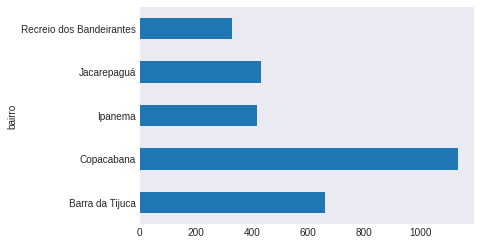

In [121]:
df_5bairros_2016.groupby(['bairro']).size().plot.barh()

In [122]:
df_5bairros_2016.groupby([df_5bairros_2016.anf_data_cadastro.dt.month]).size()

anf_data_cadastro
1     265
2     239
3     203
4     244
5     390
6     381
7     521
8     330
9      97
10    100
11    121
12     86
dtype: int64

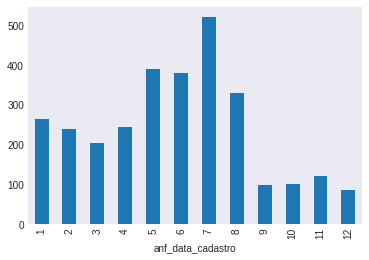

In [123]:
df_5bairros_2016.groupby([df_5bairros_2016.anf_data_cadastro.dt.month]).size().plot.bar()

## Etapa 3 - Load

#### Exportando os DataFrames em formato CSV

In [124]:
dflistings.to_csv('Anuncios.csv', index=False)
dfhosts.to_csv('Anfitrioes.csv', index=False)
df_5bairros_2016.to_csv('5Bairros_2016.csv', index=False)
df_5bairros.to_csv('5bairros.csv', index=False)

#### Exportando os DataFrames em formato JSON

In [125]:
dflistings.to_json('Anuncios.json')
dfhosts.to_json('Anfitrioes.json')
df_5bairros_2016.to_json('5Bairros_2016.json')
df_5bairros.to_json('5bairros.json')